<a href="https://colab.research.google.com/github/drspoulsen/24-fa-csi-220/blob/main/Onions2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

At 6 rings and 6 slices...
	Cut percent down: 
		 172%
	for variance of:
		0.211
At 6 rings and 7 slices...
	Cut percent down: 
		 127%
	for variance of:
		0.312
At 6 rings and 8 slices...
	Cut percent down: 
		 114%
	for variance of:
		0.316
At 6 rings and 9 slices...
	Cut percent down: 
		 108%
	for variance of:
		0.327
At 6 rings and 10 slices...
	Cut percent down: 
		 98%
	for variance of:
		0.319
At 6 rings and 11 slices...
	Cut percent down: 
		 127%
	for variance of:
		0.317
At 7 rings and 6 slices...
	Cut percent down: 
		 124%
	for variance of:
		0.304
At 7 rings and 7 slices...
	Cut percent down: 
		 172%
	for variance of:
		0.204
At 7 rings and 8 slices...
	Cut percent down: 
		 131%
	for variance of:
		0.299
At 7 rings and 9 slices...
	Cut percent down: 
		 113%
	for variance of:
		0.3
At 7 rings and 10 slices...
	Cut percent down: 
		 101%
	for variance of:
		0.301
At 7 rings and 11 slices...
	Cut percent down: 
		 92%
	for variance of:
		0.301
At 8 rings and 6 slices...
	

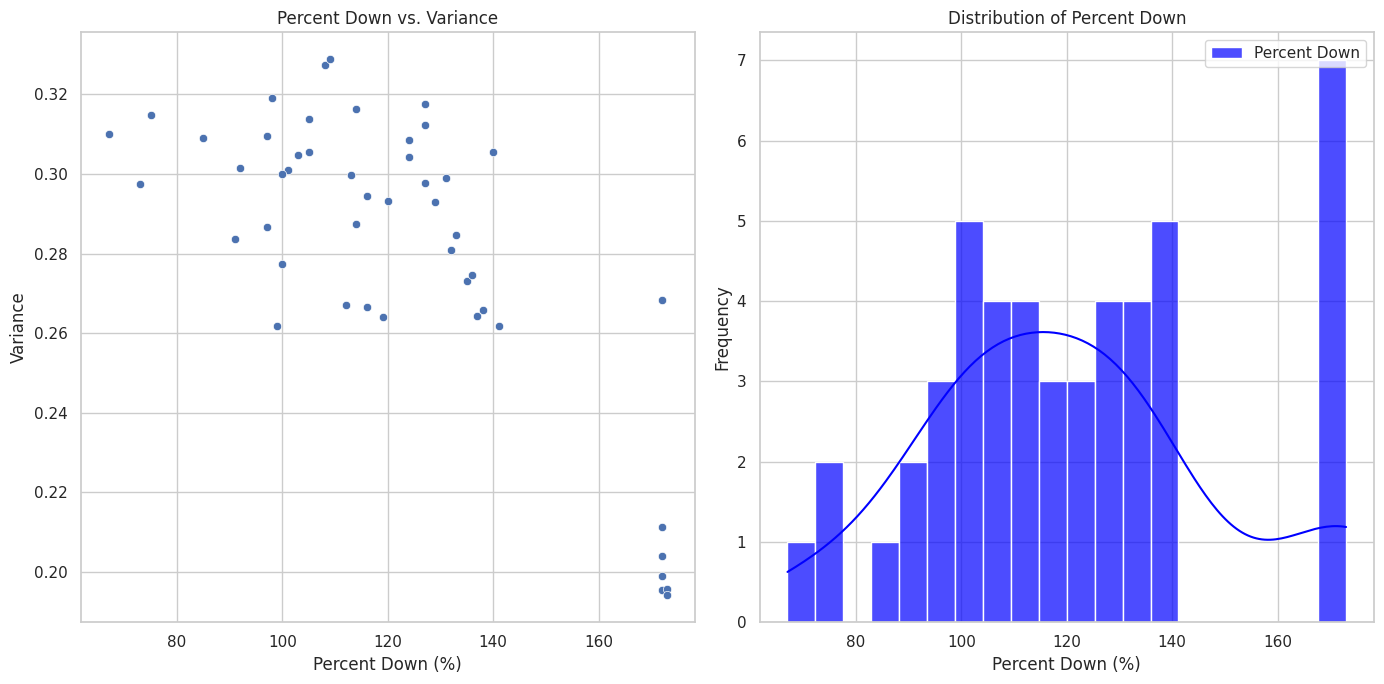

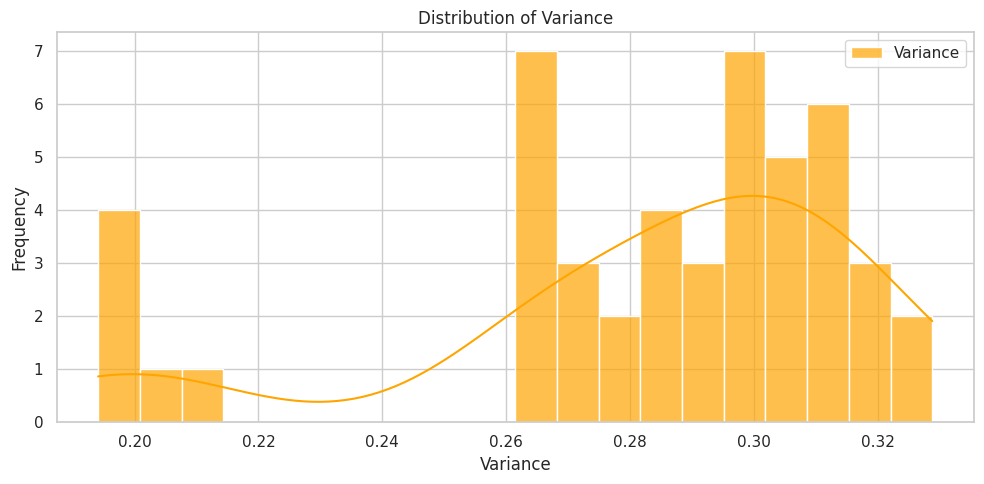

Percent Down
 	mean : 	121.167
	min : 	67
	max : 	173
Variance
 	mean : 	0.282
	min : 	0.194
	max : 	0.329
Model Coefficients: [  0.          -4.99206349 -35.60535714  -0.46031746   1.42857143
   1.34821429]
Model Intercept: 298.4992063492046
Mean Squared Error: 686.522585978836
R^2 Score: 0.08363533878726415
Regression Formula for Best Percent Down:
best_percent_down = 298.499 + -4.992*rings + -35.605*slices + -0.460*rings^2 + 1.429*rings slices + 1.348*slices^2
Predicted best percent down for 13 rings and 7 slices: 102.634%
Optimal Percent Down for 6 rings and 6 slices: 171.779%
Variance: 0.211
Optimal Percent Down for 6 rings and 8 slices: 113.966%
Variance: 0.316
Optimal Percent Down for 6 rings and 10 slices: 97.705%
Variance: 0.318
Optimal Percent Down for 8 rings and 6 slices: 96.281%
Variance: 0.307
Optimal Percent Down for 8 rings and 8 slices: 171.948%
Variance: 0.199
Optimal Percent Down for 8 rings and 10 slices: 115.685%
Variance: 0.294
Optimal Percent Down for 10 rings an

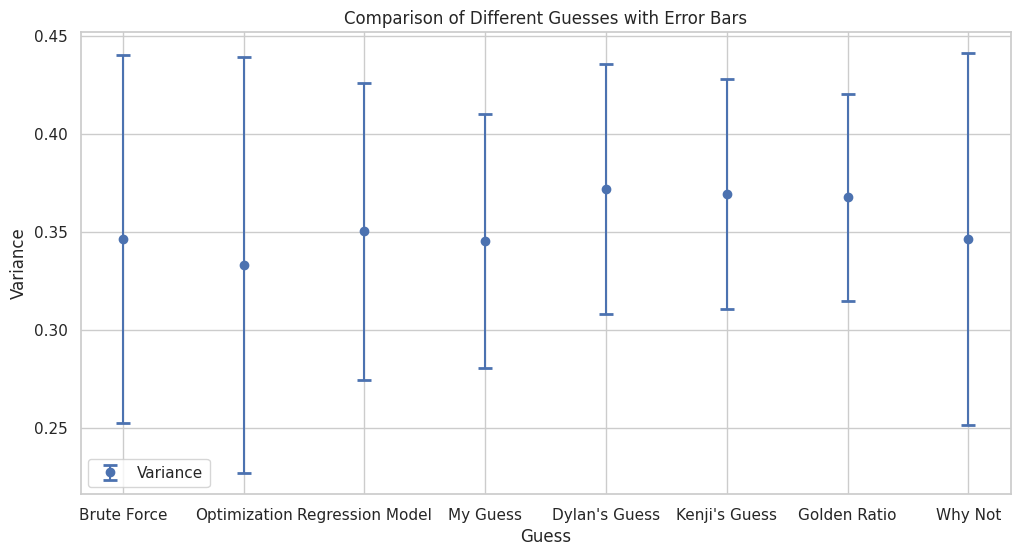

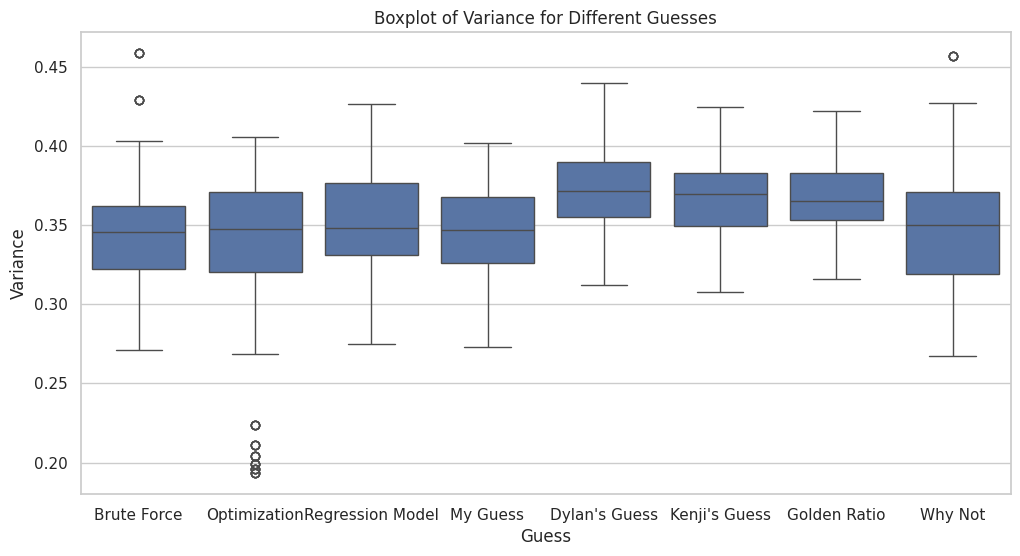

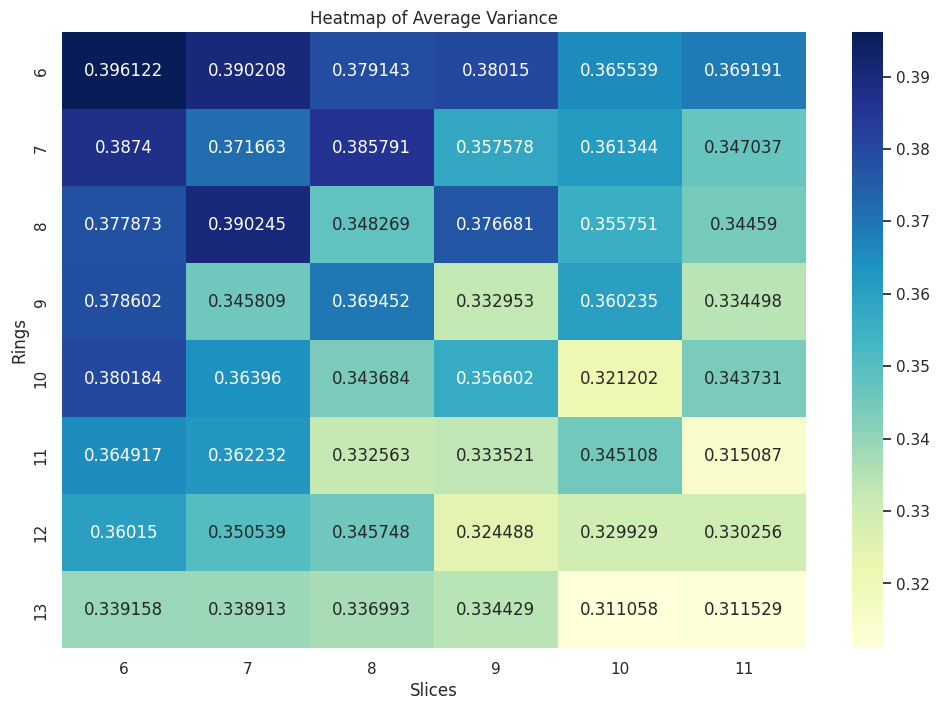

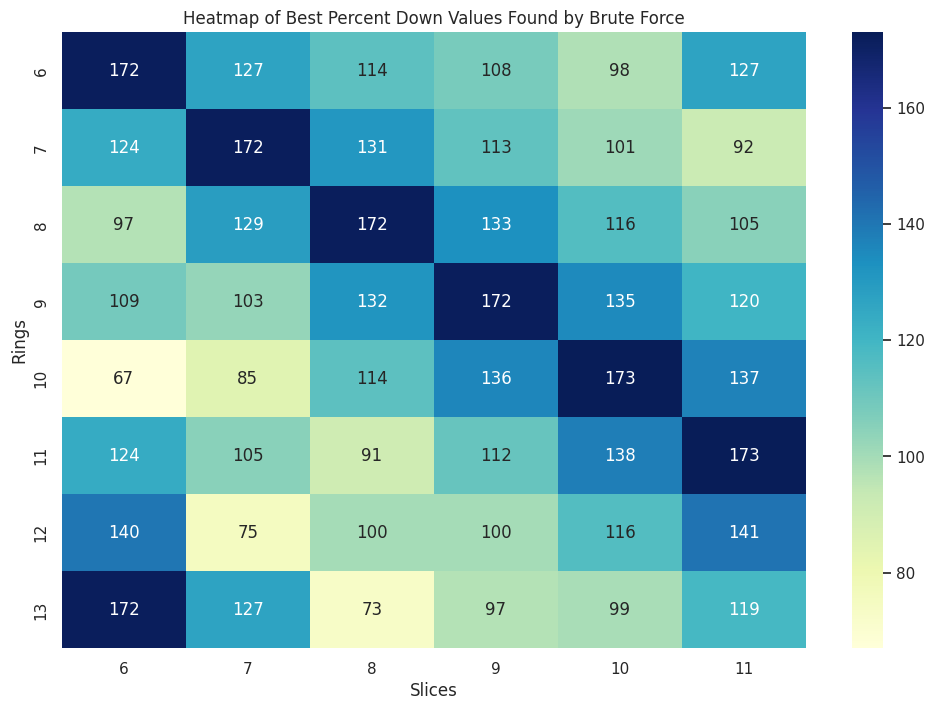

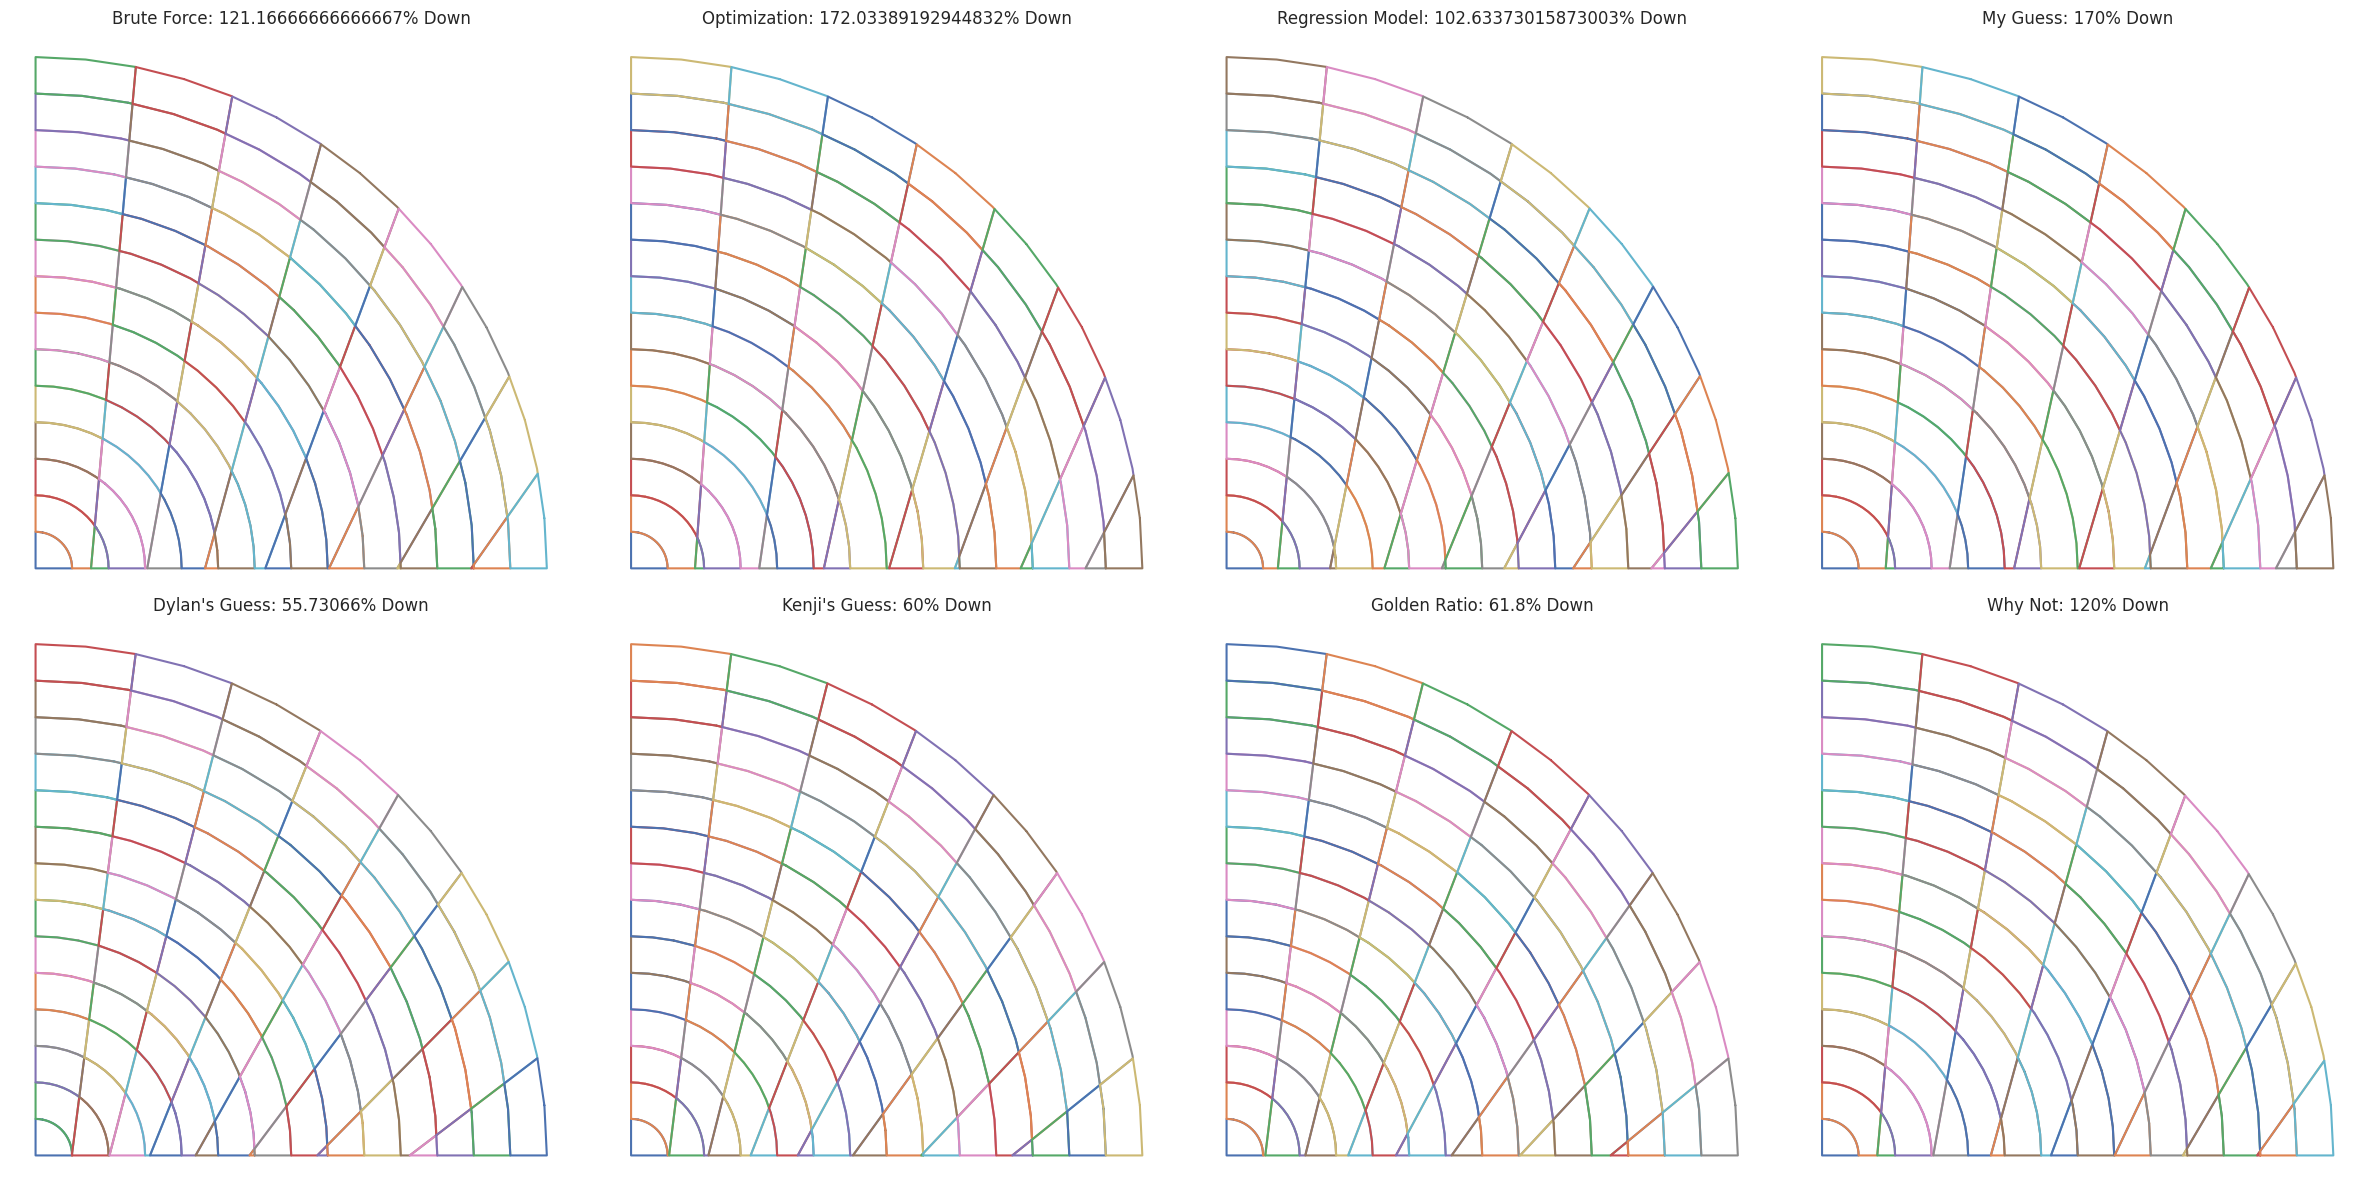

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
from scipy.optimize import dual_annealing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Configuration
circRadius = 100
totalCircleArea = math.pi * (circRadius ** 2)

# Different measures of variance
def standard_deviation(onionAreas):
    return np.std(onionAreas)

def coefficient_of_variation(onionAreas):
    return np.std(onionAreas) / np.mean(onionAreas)

def variance(onionAreas):
    return np.var(onionAreas)

# Add more measures if needed

# Function to generate rings
def generate_rings(circRadius, rings):
    ringSpacing = circRadius / (rings + 1)
    ringSpaces = np.arange(ringSpacing, circRadius + ringSpacing, ringSpacing).tolist()
    shapelyCircles = [Point(0, 0).buffer(ringSpace) for ringSpace in ringSpaces]
    for x in range(len(shapelyCircles) - 1, 0, -1):
        shapelyCircles[x] = shapelyCircles[x].difference(shapelyCircles[x - 1])
    return shapelyCircles

# Function to quarter the onion
def quarter_onion(shapelyCircles, totalCircleArea):
    quarterCut = Polygon([[0, 0], [circRadius, 0], [circRadius, circRadius], [0, circRadius]])
    quarterCircleArea = totalCircleArea / 4.0
    quarteredOnion = [shapelyCircle.intersection(quarterCut) for shapelyCircle in shapelyCircles]
    return quarteredOnion

# Function to slice the onion
def slice_onion(percentDown, slices, quarteredOnion):
    percentDown /= 100.0
    thetas = [i * 90 / (slices + 1) for i in range(slices + 1)]
    thetaRanges = [(thetas[i], thetas[i + 1]) if i + 1 < len(thetas) else (thetas[i], 90) for i in range(len(thetas))]

    shapelySlices = []
    for thetaRange in thetaRanges:
        circX0 = circRadius * 1.01 * math.cos(math.radians(90 - thetaRange[0]))
        circY0 = circRadius * 1.01 * math.sin(math.radians(90 - thetaRange[0]))
        circX1 = circRadius * 1.01 * math.cos(math.radians(90 - thetaRange[1]))
        circY1 = circRadius * 1.01 * math.sin(math.radians(90 - thetaRange[1]))
        sliceX = 0
        sliceY = -(percentDown * circRadius)
        shapelySlice = Polygon([[sliceX, sliceY], [circX0, circY0], [circX1, circY1], [sliceX, sliceY]])
        shapelySlices.append(shapelySlice)

    onionPieces = []
    for onionRing in quarteredOnion:
        for shapelySlice in shapelySlices:
            if onionRing.intersects(shapelySlice):
                onionPieces.append(onionRing.intersection(shapelySlice))
    return onionPieces

# Function to compute the selected measure of variance
def get_onion_variance(percentDown, rings, slices, measure, draw=False):
    shapelyCircles = generate_rings(circRadius, rings)
    quarteredOnion = quarter_onion(shapelyCircles, totalCircleArea)
    onionPieces = slice_onion(percentDown, slices, quarteredOnion)

    if draw:
        for piece in onionPieces:
            plt.plot(*piece.exterior.xy)
        plt.show()

    onionAreas = [piece.area for piece in onionPieces]
    return measure(onionAreas)

# Objective function for optimization
def objective(percentDown, rings, slices, measure):
    percentDown = percentDown[0]  # Ensure percentDown is interpreted as a scalar
    return get_onion_variance(percentDown, rings, slices, measure)

# Optimize onion cuts
def optimize_onion_cuts(rings_range, slices_range, measure):
    results = []
    for rings in rings_range[::2]:  # Use every other number in rings_range
        for slices in slices_range[::2]:  # Use every other number in slices_range
            bounds = [(0, 200)]
            result = dual_annealing(objective, bounds, args=(rings, slices, measure))
            best_percent_down = result.x[0]
            best_variance = result.fun
            results.append((rings, slices, best_percent_down, best_variance))
            print(f'Optimal Percent Down for {rings} rings and {slices} slices: {best_percent_down:.3f}%')
            print(f'Variance: {best_variance:.3f}')

    return results

# Brute force method to find best cuts
def brute_force_onion_cuts(rings_range, slices_range, measure):
    pDowns, variances = [], []
    best_values = np.zeros((len(rings_range), len(slices_range)))
    data = []

    for ring in rings_range:
        for sliceNum in slices_range:
            percentResults = [(percent, get_onion_variance(percent, ring, sliceNum, measure)) for percent in range(0, 200, 1)]
            best = min(percentResults, key=lambda t: t[1])
            print(f'At {ring} rings and {sliceNum} slices...')
            print(f'\tCut percent down: \n\t\t {round(best[0], 3)}%\n\tfor variance of:\n\t\t{round(best[1], 3)}')
            pDowns.append(best[0])
            variances.append(best[1])
            best_values[rings_range.index(ring), slices_range.index(sliceNum)] = best[0]
            data.append([ring, sliceNum, best[0]])

    sns.set(style="whitegrid")

    plt.figure(figsize=(14, 7))

    # Plot Percent Down vs Variance
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=pDowns, y=variances)
    plt.xlabel('Percent Down (%)')
    plt.ylabel('Variance')
    plt.title('Percent Down vs. Variance')

    # Plot Distributions
    plt.subplot(1, 2, 2)
    sns.histplot(pDowns, bins=20, kde=True, label='Percent Down', color='blue', alpha=0.7)
    plt.xlabel('Percent Down (%)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Percent Down')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.histplot(variances, bins=20, kde=True, label='Variance', color='orange', alpha=0.7)
    plt.xlabel('Variance')
    plt.ylabel('Frequency')
    plt.title('Distribution of Variance')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    print(f'Percent Down\n \tmean : \t{round(np.mean(pDowns), 3)}\n\tmin : \t{round(np.min(pDowns), 3)}\n\tmax : \t{round(np.max(pDowns), 3)}')
    print(f'Variance\n \tmean : \t{round(np.mean(variances), 3)}\n\tmin : \t{round(np.min(variances), 3)}\n\tmax : \t{round(np.max(variances), 3)}')

    return np.mean(pDowns), best_values, pd.DataFrame(data, columns=["rings", "slices", "best_percent_down"])  # Return the mean of the best percentDown values, the best values matrix, and the data as a DataFrame

# Fit regression model
def fit_regression_model(data):
    X = data[['rings', 'slices']]
    y = data['best_percent_down']
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    print("Model Coefficients:", model.coef_)
    print("Model Intercept:", model.intercept_)
    print("Mean Squared Error:", mean_squared_error(y, y_pred))
    print("R^2 Score:", r2_score(y, y_pred))

    return model, poly

def predict_best_percent_down(model, poly, rings, slices):
    X = pd.DataFrame([[rings, slices]], columns=['rings', 'slices'])
    X_poly = poly.transform(X)
    return model.predict(X_poly)[0]

def get_regression_formula(model, poly):
    terms = poly.get_feature_names_out(['rings', 'slices'])
    coefs = model.coef_
    intercept = model.intercept_

    formula = f"{intercept:.3f}"
    for coef, term in zip(coefs, terms):
        if term == "1":
            continue
        formula += f" + {coef:.3f}*{term}"
    return formula

def compare_guesses(rings_range, slices_range, guesses, measure, num_trials=5):
    results = {guess_name: [] for guess_name in guesses}

    for _ in range(num_trials):
        for ring in rings_range:
            for sliceNum in slices_range:
                for guess_name, percent_down in guesses.items():
                    variance = get_onion_variance(percent_down, ring, sliceNum, measure)
                    results[guess_name].append(variance)

    stats = {}
    for guess_name, variances in results.items():
        avg_variance = np.mean(variances)
        min_variance = np.min(variances)
        max_variance = np.max(variances)
        stats[guess_name] = (avg_variance, min_variance, max_variance)
        print(f'{guess_name} guess: avg variance = {avg_variance:.3f}, min variance = {min_variance:.3f}, max variance = {max_variance:.3f}')

    # Plot comparison with error bars
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    names = list(stats.keys())
    values = [stat[0] for stat in stats.values()]
    errors = [(stat[2] - stat[1]) / 2 for stat in stats.values()]
    plt.errorbar(names, values, yerr=errors, fmt='o', capsize=5, capthick=2, label='Variance')
    plt.xlabel('Guess')
    plt.ylabel('Variance')
    plt.title('Comparison of Different Guesses with Error Bars')
    plt.legend()
    plt.show()

    # Boxplot for better visualization of variance spread
    plt.figure(figsize=(12, 6))
    variances_data = []
    for guess_name, variances in results.items():
        for variance in variances:
            variances_data.append([guess_name, variance])
    variances_df = pd.DataFrame(variances_data, columns=["Guess", "Variance"])
    sns.boxplot(x="Guess", y="Variance", data=variances_df)
    plt.xlabel('Guess')
    plt.ylabel('Variance')
    plt.title('Boxplot of Variance for Different Guesses')
    plt.show()

    return variances_df  # Return the dataframe for further analysis

def plot_heatmap_of_avg_variances(variances_df, rings_range, slices_range):
    heatmap_data = np.zeros((len(rings_range), len(slices_range)))

    for i, rings in enumerate(rings_range):
        for j, slices in enumerate(slices_range):
            subset = variances_df[(variances_df['rings'] == rings) & (variances_df['slices'] == slices)]
            heatmap_data[i, j] = subset['Variance'].mean()

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, xticklabels=slices_range, yticklabels=rings_range, cmap="YlGnBu", annot=True, fmt="g")
    plt.xlabel('Slices')
    plt.ylabel('Rings')
    plt.title('Heatmap of Average Variance')
    plt.show()

def plot_best_values_heatmap(best_values, rings_range, slices_range):
    plt.figure(figsize=(12, 8))
    sns.heatmap(best_values, xticklabels=slices_range, yticklabels=rings_range, cmap="YlGnBu", annot=True, fmt="g")
    plt.xlabel('Slices')
    plt.ylabel('Rings')
    plt.title('Heatmap of Best Percent Down Values Found by Brute Force')
    plt.show()

def draw_onion_pieces(percentDown, rings, slices, ax, title):
    shapelyCircles = generate_rings(circRadius, rings)
    quarteredOnion = quarter_onion(shapelyCircles, totalCircleArea)
    onionPieces = slice_onion(percentDown, slices, quarteredOnion)

    for piece in onionPieces:
        ax.plot(*piece.exterior.xy)
    ax.set_title(title)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')  # Turn off the axis

# Example usage:
rings_range = range(6, 14)  # Using a typical range of rings for onions (6 to 13)
slices_range = range(6, 12)  # Slices range can remain the same
num_trials = 5  # Define number of trials

# Select the measure of variance
measure = coefficient_of_variation  # Choose from standard_deviation, coefficient_of_variation, variance

# Perform brute force search
average_brute_force_percent, best_values, data = brute_force_onion_cuts(rings_range, slices_range, measure)

# Fit regression model
model, poly = fit_regression_model(data)

# Output regression formula
formula = get_regression_formula(model, poly)
print("Regression Formula for Best Percent Down:")
print(f"best_percent_down = {formula}")

# Predict best percentage down for specific rings and slices
rings = 13
slices = 7
predicted_best_percent_down = predict_best_percent_down(model, poly, rings, slices)
print(f'Predicted best percent down for {rings} rings and {slices} slices: {predicted_best_percent_down:.3f}%')

# Perform optimization
optimization_results = optimize_onion_cuts(rings_range, slices_range, measure)
best_optimization = min(optimization_results, key=lambda x: x[3])
# Extract percent_down and cv values from the optimization results
percent_down_values = [result[2] for result in optimization_results]
cv_values = [result[3] for result in optimization_results]

# Compute the average percent_down and cv
average_percent_down = np.mean(percent_down_values)
average_cv = np.mean(cv_values)

# Create a tuple representing the average optimization result
average_optimization = (average_percent_down, average_cv)
print(f'Best optimization result: {best_optimization[2]:.3f}% for {best_optimization[0]} rings and {best_optimization[1]} slices')
print(f'Average optimization result: {average_optimization[0]:.3f}% down with CV: {average_optimization[1]:.3f}')

# Define guesses
guesses = {
    "Brute Force": average_brute_force_percent,
    "Optimization": average_optimization[0],
    "Regression Model": predicted_best_percent_down,
    "My Guess": 170,
    "Dylan's Guess": 55.73066,
    "Kenji's Guess": 60,
    "Golden Ratio": 61.8,
    "Why Not": 120
}

variances_df = compare_guesses(rings_range, slices_range, guesses, measure, num_trials)

# Create a proper DataFrame with rings and slices information
rings_slices_data = []
for ring in rings_range:
    for sliceNum in slices_range:
        for guess_name, percent_down in guesses.items():
            variance = get_onion_variance(percent_down, ring, sliceNum, measure)
            rings_slices_data.append([guess_name, ring, sliceNum, variance])
variances_df = pd.DataFrame(rings_slices_data, columns=["Guess", "rings", "slices", "Variance"])

# Plot heatmap of average variances
plot_heatmap_of_avg_variances(variances_df, rings_range, slices_range)

# Plot heatmap of best values found by brute force
plot_best_values_heatmap(best_values, rings_range, slices_range)

# Draw onion pieces for each guess side by side
fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()
for i, (guess_name, percent_down) in enumerate(guesses.items()):
    title = f'{guess_name}: {percent_down}% Down'
    draw_onion_pieces(percent_down, rings, slices, axes[i], title)
plt.tight_layout()
plt.show()

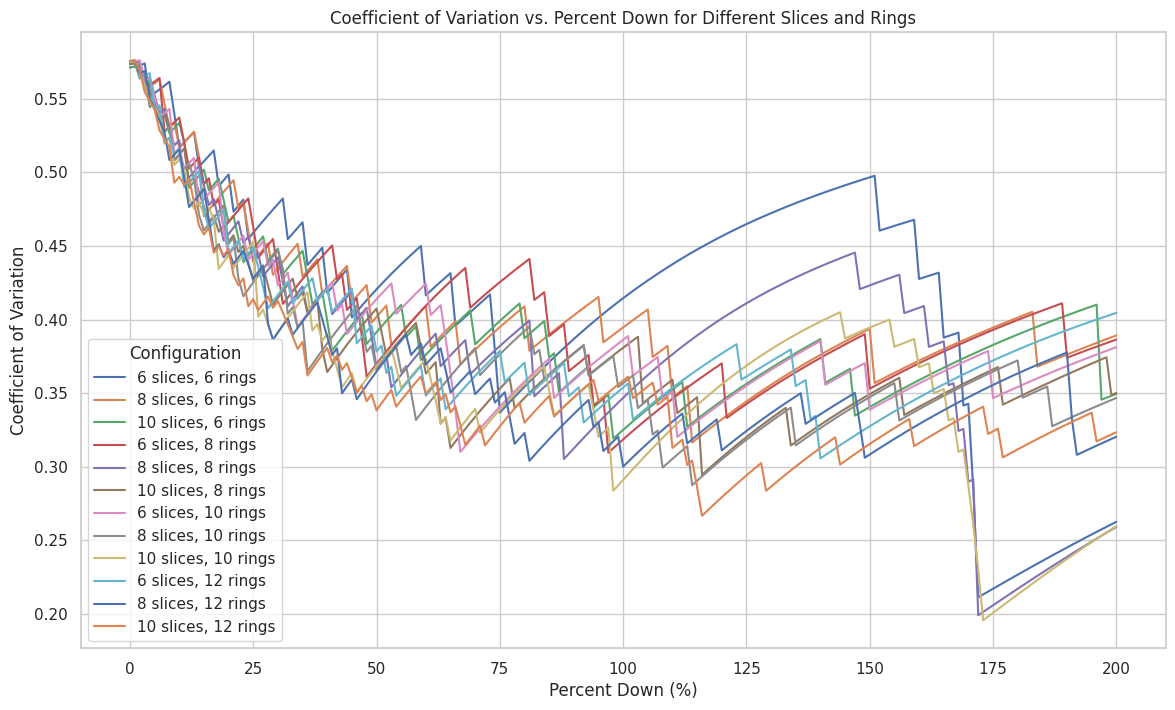

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon

# Configuration
circRadius = 100
totalCircleArea = math.pi * (circRadius ** 2)

# Different measures of variance
def standard_deviation(onionAreas):
    return np.std(onionAreas)

def coefficient_of_variation(onionAreas):
    return np.std(onionAreas) / np.mean(onionAreas)

def variance(onionAreas):
    return np.var(onionAreas)

# Add more measures if needed

# Function to generate rings
def generate_rings(circRadius, rings):
    ringSpacing = circRadius / (rings + 1)
    ringSpaces = np.arange(ringSpacing, circRadius + ringSpacing, ringSpacing).tolist()
    shapelyCircles = [Point(0, 0).buffer(ringSpace) for ringSpace in ringSpaces]
    for x in range(len(shapelyCircles) - 1, 0, -1):
        shapelyCircles[x] = shapelyCircles[x].difference(shapelyCircles[x - 1])
    return shapelyCircles

# Function to quarter the onion
def quarter_onion(shapelyCircles, totalCircleArea):
    quarterCut = Polygon([[0, 0], [circRadius, 0], [circRadius, circRadius], [0, circRadius]])
    quarterCircleArea = totalCircleArea / 4.0
    quarteredOnion = [shapelyCircle.intersection(quarterCut) for shapelyCircle in shapelyCircles]
    return quarteredOnion

# Function to slice the onion
def slice_onion(percentDown, slices, quarteredOnion):
    percentDown /= 100.0
    thetas = [i * 90 / (slices + 1) for i in range(slices + 1)]
    thetaRanges = [(thetas[i], thetas[i + 1]) if i + 1 < len(thetas) else (thetas[i], 90) for i in range(len(thetas))]

    shapelySlices = []
    for thetaRange in thetaRanges:
        circX0 = circRadius * 1.01 * math.cos(math.radians(90 - thetaRange[0]))
        circY0 = circRadius * 1.01 * math.sin(math.radians(90 - thetaRange[0]))
        circX1 = circRadius * 1.01 * math.cos(math.radians(90 - thetaRange[1]))
        circY1 = circRadius * 1.01 * math.sin(math.radians(90 - thetaRange[1]))
        sliceX = 0
        sliceY = -(percentDown * circRadius)
        shapelySlice = Polygon([[sliceX, sliceY], [circX0, circY0], [circX1, circY1], [sliceX, sliceY]])
        shapelySlices.append(shapelySlice)

    onionPieces = []
    for onionRing in quarteredOnion:
        for shapelySlice in shapelySlices:
            if onionRing.intersects(shapelySlice):
                onionPieces.append(onionRing.intersection(shapelySlice))
    return onionPieces

# Function to compute the selected measure of variance
def get_onion_variance(percentDown, rings, slices, measure, draw=False):
    shapelyCircles = generate_rings(circRadius, rings)
    quarteredOnion = quarter_onion(shapelyCircles, totalCircleArea)
    onionPieces = slice_onion(percentDown, slices, quarteredOnion)

    if draw:
        for piece in onionPieces:
            plt.plot(*piece.exterior.xy)
        plt.show()

    onionAreas = [piece.area for piece in onionPieces]
    return measure(onionAreas)

# Select the measure of variance
measure = coefficient_of_variation  # Choose from standard_deviation, coefficient_of_variation, variance

# Run brute force for specific rings and slices
def brute_force_for_specific_case(rings, slices, measure, percent_range):
    percent_results = [(percent, get_onion_variance(percent, rings, slices, measure)) for percent in percent_range]
    return percent_results

# Define ranges of rings and slices
rings_range = range(6, 14)  # Using a typical range of rings for onions (6 to 13)
slices_range = range(6, 12)  # Slices range can remain the same
percent_range = np.linspace(0, 200, 201)

# Plot the results for different combinations of rings and slices
plt.figure(figsize=(14, 8))

for rings in rings_range[::2]:  # Use every other number in rings_range
    for slices in slices_range[::2]:  # Use every other number in slices_range
        percent_results = brute_force_for_specific_case(rings, slices, measure, percent_range)
        percent_down_values = [result[0] for result in percent_results]
        variance_values = [result[1] for result in percent_results]
        plt.plot(percent_down_values, variance_values, label=f'{slices} slices, {rings} rings')

plt.xlabel('Percent Down (%)')
plt.ylabel('Coefficient of Variation')
plt.title('Coefficient of Variation vs. Percent Down for Different Slices and Rings')
plt.legend(title='Configuration')
plt.grid(True)
plt.show()
